<a href="https://colab.research.google.com/github/Rifki243/Proyek-Analisis-Data/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: **Bike Sharing Dataset**
- **Nama:** Muhamad Rifki Ardi Priadi
- **Email:** muhamadpriadi520@gmail.com
- **ID Dicoding:** MC012D5Y1071

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca `weathersit` terhadap jumlah sepeda yang disewa?
- Pada jam berapa jumlah penyewaan sepeda paling tinggi dan bagaimana pola ini berubah sepanjang hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [115]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [116]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada tahap gathering data ini kita load semua data yang ada pada csv yang dibuat menjadi dataframe
- Fungsi dari gathering data adalah untuk mengumpulkan semua data yang dibutuhkan

### Assessing Data

#### Menilai Data day_df

In [117]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [118]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [119]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [120]:
print("Jumllah Duplikasi : ", day_df.duplicated().sum())
day_df.describe()

Jumllah Duplikasi :  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [121]:
# Tanggal yang mendapatkan weathersit max
day_df[day_df.weathersit == day_df.weathersit.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623
89,90,2011-03-31,2,0,3,0,4,1,3,0.268333,0.257575,0.918333,0.217646,179,1506,1685
105,106,2011-04-16,2,0,4,0,6,0,3,0.430833,0.425492,0.888333,0.340808,121,674,795
248,249,2011-09-06,3,0,9,0,2,1,3,0.540000,0.515200,0.886957,0.343943,204,2506,2710
249,250,2011-09-07,3,0,9,0,3,1,3,0.599167,0.544229,0.917083,0.097021,118,1878,1996
250,251,2011-09-08,3,0,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748,153,1689,1842
284,285,2011-10-12,4,0,10,0,3,1,3,0.543333,0.517717,0.906250,0.248150,217,2199,2416
291,292,2011-10-19,4,0,10,0,3,1,3,0.541739,0.513848,0.895217,0.243339,254,2170,2424
301,302,2011-10-29,4,0,10,0,6,0,3,0.254167,0.227913,0.882500,0.351371,57,570,627


#### Menilai Data hour_df

In [122]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [123]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [124]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [125]:
print("Jumlah Duplikasi : ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah Duplikasi :  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [126]:
# Cek distribusi nilai pada kolom weathersit di kedua dataset
print("Distribusi weathersit di day.csv:")
print(day_df['weathersit'].value_counts())

print("\nDistribusi weathersit di hour.csv:")
print(hour_df['weathersit'].value_counts())

# Cek apakah ada nilai 4 di hour.csv tetapi tidak ada di day.csv
if 4 in hour_df['weathersit'].unique() and 4 not in day_df['weathersit'].unique():
    print("\n Anomali terdeteksi! Ada nilai 4 di hour.csv tetapi tidak ada di day.csv.")
else:
    print("\n Tidak ada anomali terkait nilai weathersit.")

Distribusi weathersit di day.csv:
weathersit
1    463
2    247
3     21
Name: count, dtype: int64

Distribusi weathersit di hour.csv:
weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

 Anomali terdeteksi! Ada nilai 4 di hour.csv tetapi tidak ada di day.csv.


In [127]:
# Menyebutkan cnt yang weathersit nya 4
hour_df[hour_df.weathersit == 4]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
585,586,2011-01-26,1,0,1,16,0,3,1,4,0.22,0.1970,0.93,0.3284,1,35,36
8854,8855,2012-01-09,1,1,1,18,0,1,1,4,0.20,0.2273,0.86,0.0896,6,158,164
9123,9124,2012-01-21,1,1,1,1,0,6,0,4,0.14,0.1364,0.86,0.1940,1,22,23


#### **Insight:**
- Terdapat anomali pada data weathersit anatar kedua dataset dimana pada dataset `day_df` tidak ada nilai 4 sedangkan pada dataset `hour_df` terdapat nilai 4 yang mengatakan kondisi cuaca yang buruk. Namun melihat dari hasil kecocokan ternyata nilai pada `day_df` diambil dari nilai modus atau nilai yang sering muncul dalam kurun waktu 1 hari.
- Merubah nama kolom dengan penyebutan yg mudah dibaca.

### Cleaning Data

#### Merubah Nama Kolom Dataset `day_df` dan `hour_df`

In [128]:
# Merubah nama kolom pada dataset day_df yatiu untuk dteday, yr, mnth, weathersit, casual, cnt
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather',
    'casual': 'non-registered',
    'cnt' : 'total'}, inplace=True)

day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,non-registered,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [129]:
# Merubah nama kolom pada dataset hour_df yatiu untuk dteday, yr, mnth, hr, weathersit, casual, cnt
hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr' : 'hour',
    'weathersit': 'weather',
    'casual': 'non-registered',
    'cnt' : 'total'}, inplace=True)

hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,non-registered,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Memastikan nilai `weathersit` pada `day_df` dengan `hour_df`

In [130]:
dates_with_4 = hour_df[hour_df['weather'] == 4]['date'].unique()
print(dates_with_4)

['2011-01-26' '2012-01-09' '2012-01-21']


In [131]:
# Ambil data day_df untuk tanggal yang memiliki weathersit=4 di hour_df
comparison = day_df[day_df['date'].isin(dates_with_4)][['date', 'weather']]

print(comparison)

           date  weather
25   2011-01-26        3
373  2012-01-09        2
385  2012-01-21        2


In [132]:
weathersit_agg = hour_df.groupby('date')['weather'].agg(['mean', lambda x: x.mode()[0], 'max'])
weathersit_agg.columns = ['mean', 'mode', 'max']

# Gabungkan dengan nilai weathersit di day_df
comparison = day_df[day_df['date'].isin(dates_with_4)][['date', 'weather']].merge(weathersit_agg, on='date')

# Tampilkan hasil dari tanggal yang memiliki weathersit=4
print(comparison)

         date  weather      mean  mode  max
0  2011-01-26        3  2.937500     3    4
1  2012-01-09        2  2.041667     2    4
2  2012-01-21        2  2.458333     2    4


#### Merubah Tipe Data `workingday`

In [133]:
day_df['workingday'] = day_df['workingday'].astype(object)
day_df = day_df.replace({False: "No", True: "Yes"})
day_df.info()
day_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   instant         731 non-null    int64  
 1   date            731 non-null    object 
 2   season          731 non-null    int64  
 3   year            731 non-null    int64  
 4   month           731 non-null    int64  
 5   holiday         731 non-null    int64  
 6   weekday         731 non-null    int64  
 7   workingday      731 non-null    object 
 8   weather         731 non-null    int64  
 9   temp            731 non-null    float64
 10  atemp           731 non-null    float64
 11  hum             731 non-null    float64
 12  windspeed       731 non-null    float64
 13  non-registered  731 non-null    int64  
 14  registered      731 non-null    int64  
 15  total           731 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 91.5+ KB


,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,non-registered,registered,total
0,1,2011-01-01,1,0,1,0,6,No,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,No,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,Yes,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,Yes,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,Yes,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [134]:
hour_df['workingday'] = hour_df['workingday'].astype(object)
hour_df = hour_df.replace({False: "No", True: "Yes"})
hour_df.info()
hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   instant         17379 non-null  int64  
 1   date            17379 non-null  object 
 2   season          17379 non-null  int64  
 3   year            17379 non-null  int64  
 4   month           17379 non-null  int64  
 5   hour            17379 non-null  int64  
 6   holiday         17379 non-null  int64  
 7   weekday         17379 non-null  int64  
 8   workingday      17379 non-null  object 
 9   weather         17379 non-null  int64  
 10  temp            17379 non-null  float64
 11  atemp           17379 non-null  float64
 12  hum             17379 non-null  float64
 13  windspeed       17379 non-null  float64
 14  non-registered  17379 non-null  int64  
 15  registered      17379 non-null  int64  
 16  total           17379 non-null  int64  
dtypes: float64(4), int64(11), objec

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,non-registered,registered,total
0,1,2011-01-01,1,0,1,0,0,6,No,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,No,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,No,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,No,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,No,1,0.24,0.2879,0.75,0.0,0,1,1


#### **Insight:**
- Memastikan nilai maximum pada `day_df` dan `hour_df` karena terlihat seperti anomali.
- Merubah nama kolom supaya mudah untuk dipahami dari sisi pembaca.
- Merubah tipe data pada `workingday` karena hanya memberitahukan apakah waktu kerja atau tidak, jadi supaya mengetahui maksud dari data tersebut diganti lahmenjadi tipe data `object` yaitu 'No' dan 'Yes'.

## Exploratory Data Analysis (EDA)

### Explore bagaimana pengaruh cuaca `weathersit` terhadap jumlah sepeda yang disewa?

In [135]:
day_df

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,non-registered,registered,total
0,1,2011-01-01,1,0,1,0,6,No,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,No,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,Yes,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,Yes,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,Yes,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,Yes,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,Yes,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,No,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,No,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [136]:
hour_df

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,non-registered,registered,total
0,1,2011-01-01,1,0,1,0,0,6,No,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,No,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,No,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,No,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,No,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,Yes,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,Yes,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,Yes,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,Yes,1,0.26,0.2727,0.56,0.1343,13,48,61


In [137]:
weather_day = day_df.groupby(by='weather').agg({
    'total': ['max', 'min', 'mean', 'sum']
}).reset_index()

weather_day

weather total                           
            max  min         mean      sum
0       1  8714  431  4876.786177  2257952
1       2  8362  605  4035.862348   996858
2       3  4639   22  1803.285714    37869

In [138]:
# Simpan ke csv
weather_day.to_csv('weather_day.csv', index=False)

In [139]:
weather_hour = hour_df.groupby(by='weather').agg({
    'hour' : 'count',
    'total': ['max', 'min', 'mean', 'sum']
}).reset_index()

weather_hour

weather   hour total                         
           count   max min        mean      sum
0       1  11413   977   1  204.869272  2338173
1       2   4544   957   1  175.165493   795952
2       3   1419   891   1  111.579281   158331
3       4      3   164  23   74.333333      223

In [140]:
# Simpan ke csv
weather_hour.to_csv('weather_hour.csv', index=False)

### Explore pada jam berapa jumlah penyewaan sepeda paling tinggi dan bagaimana pola ini berubah sepanjang hari kerja dan akhir pekan?



In [141]:
# Menampilkan total yang paling tinggi pada jam berapa saja?
hourly_summary = hour_df.groupby(by=['hour', 'workingday']).agg({
    'total': ['max', 'min', 'mean', 'sum']
}).sort_values(by=[('workingday'), ('total', 'sum')], ascending=False).reset_index()

hourly_summary.head(4)

hour workingday total                        
                    max min        mean     sum
0   17        Yes   976  26  525.290581  262120
1   18        Yes   977  26  492.226908  245129
2    8        Yes   839  31  477.006048  236595
3   19        Yes   743  18  348.401606  173504

In [142]:
# Simpan ke csv
hourly_summary.to_csv('hourly_summary.csv', index=False)

In [143]:
# Menampilkan pola yang berubah selama workingday antara Yes dan No
workingday_summary = hour_df.groupby(by=['workingday', 'hour']).agg({
    'total': ['max', 'min', 'mean', 'sum']
}).sort_values(
    by=['workingday', ('total', 'sum')],
    ascending=[False, False],  # 'Yes' dulu, lalu urutkan total dari besar ke kecil
    key=lambda x: x.map({'Yes': 1, 'No': 0}) if x.name == 'workingday' else x
).reset_index()

workingday_summary

workingday hour total                        
                     max min        mean     sum
0         Yes   17   976  26  525.290581  262120
1         Yes   18   977  26  492.226908  245129
2         Yes    8   839  31  477.006048  236595
3         Yes   19   743  18  348.401606  173504
4         Yes   16   634  13  293.122244  146268
5         Yes    7   596  18  290.612903  144144
6         Yes   20   567  23  249.718876  124360
7         Yes    9   426  23  241.518145  119793
8         Yes   15   601  13  201.331325  100263
9         Yes   12   471   3  200.820926   99808
10        Yes   13   428  11  198.429719   98818
11        Yes   21   398   6  186.287149   92771
12        Yes   14   651  12  183.572289   91419
13        Yes   11   361  10  158.229839   78482
14        Yes   22   321  11  138.389558   68918
15        Yes   10   275   8  135.366935   67142
16        Yes    6   213   7  102.500000   50840
17        Yes   23   256   9   88.708835   44177
18        Yes    0   283   2   36.786290   18246
19        Yes    5    66   1   24.913131   12332
20        Yes    1   114   1   16.552632    8177
21        Yes    2    74   1    8.683778    4229
22        Yes    4    17   1    5.429787    2552
23        Yes    3    36   1    4.942553    2323
24         No   13   760  30  372.731602   86101
25         No   12   776  32  366.259740   84606
26         No   14   750  23  364.645022   84233
27         No   15   750   7  358.813853   82886
28         No   16   783  11  352.727273   81480
29         No   17   731  15  323.549784   74740
30         No   11   663  27  315.316017   72838
31         No   18   676  23  281.056522   64643
32         No   10   539  12  255.909091   59115
33         No   19   554  11  231.673913   53285
34         No   20   551  11  174.739130   40190
35         No    9   397  14  171.623377   39645
36         No   21   584   7  142.060870   32674
37         No   22   502   9  116.060870   26694
38         No    8   597   5  105.653680   24406
39         No    0   249   6   90.800000   20884
40         No   23   239   2   85.930435   19764
41         No    1   168   4   69.508696   15987
42         No    2   132   2   53.171053   12123
43         No    7   387   1   43.406926   10027
44         No    3    79   2   25.775330    5851
45         No    6   133   1   18.742358    4292
46         No    5    55   1    8.689189    1929
47         No    4    28   1    8.264317    1876

In [144]:
# Simpan ke csv
workingday_summary.to_csv('workingday_summary.csv', index=False)

### **Insight:**
- Bisa dilihat bahwa pengaruh cuaca sangat memegang peran penting dalam berapa jumlah sepeda yang tersewa.
- Selain dari faktor cuaca, jumlah dari banyak nya sepeda yang tersewa bisa dilihat pada jam berapa saja dan juga dalam kondisi hari bekerja atau libur.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca `weathersit` terhadap jumlah sepeda yang disewa?

<ipython-input-145-e13beb4de3de>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather', y='total_rentals', data=weather_agg, palette='Blues', ax=axes[0])
<ipython-input-145-e13beb4de3de>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather', y='mean_rentals', data=weather_agg, palette='Greens', ax=axes[1])


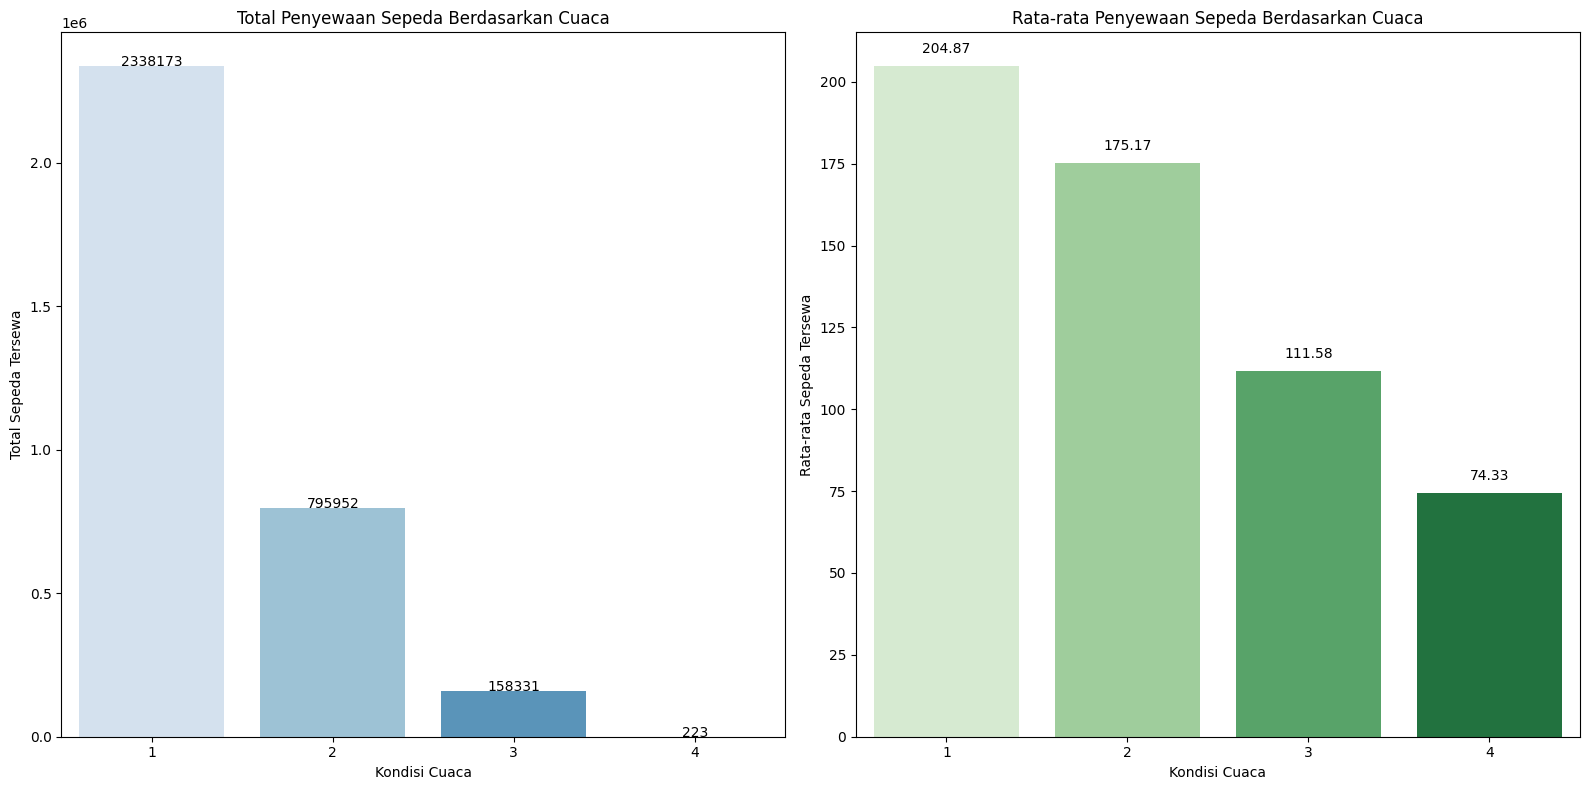

In [145]:
# Agregasi data untuk total dan mean penyewaan
weather_agg = hour_df.groupby(by='weather').agg({'total': ['sum', 'mean']}).reset_index()
weather_agg.columns = ['weather', 'total_rentals', 'mean_rentals']

# Buat figure dengan 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Bar Chart untuk total penyewaan
sns.barplot(x='weather', y='total_rentals', data=weather_agg, palette='Blues', ax=axes[0])
axes[0].set_title('Total Penyewaan Sepeda Berdasarkan Cuaca')
axes[0].set_xlabel('Kondisi Cuaca')
axes[0].set_ylabel('Total Sepeda Tersewa')

# Tambahkan label angka di atas batang
for index, value in enumerate(weather_agg['total_rentals']):
    axes[0].text(index, value + 500, str(int(value)), ha='center', fontsize=10)

# Bar Chart untuk rata-rata penyewaan
sns.barplot(x='weather', y='mean_rentals', data=weather_agg, palette='Greens', ax=axes[1])
axes[1].set_title('Rata-rata Penyewaan Sepeda Berdasarkan Cuaca')
axes[1].set_xlabel('Kondisi Cuaca')
axes[1].set_ylabel('Rata-rata Sepeda Tersewa')

# Tambahkan label angka di atas batang
for index, value in enumerate(weather_agg['mean_rentals']):
    axes[1].text(index, value + 4, f"{value:.2f}", ha='center', fontsize=10)

# Tampilkan grafik
plt.tight_layout()
plt.show()

### Pertanyaan 2: Pada jam berapa jumlah penyewaan sepeda paling tinggi dan bagaimana pola ini berubah sepanjang hari kerja dan akhir pekan?

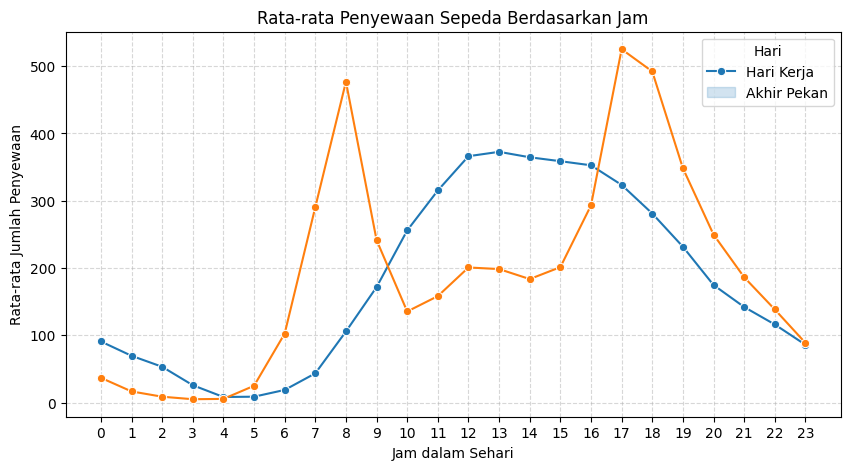

In [146]:
# Agregasi data berdasarkan jam dan workingday (Yes = Hari Kerja, No = Akhir Pekan)
hourly_trend = hour_df.groupby(['workingday', 'hour']).agg({'total': 'mean'}).reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_trend, x='hour', y='total', hue='workingday', marker='o')

# Tambahkan judul dan label
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(0, 24))  # Menampilkan semua jam (0-23)
plt.legend(title='Hari', labels=['Hari Kerja', 'Akhir Pekan'])

# Tampilkan grafik
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### **Insight:**
- Pada pertanyaan pertama terdapat 2 visualisasi bar chart mengenai total penyewaan dan rata-rata penyewaan terhadap kondisi cuaca.
- pada pertanyaan kedua terdapat line chart dengan 2 line yang menyatakan antara hari kerja dan libur terhadap jumlah jam/hari nya.

## Analisis Lanjutan (Opsional)

In [147]:
# Gunakan data penyewaan sepeda (hour_df)
rfm_df = hour_df.copy()

# Pastikan kolom 'date' adalah datetime
rfm_df['date'] = pd.to_datetime(rfm_df['date'])

# Tentukan tanggal referensi sebagai hari terakhir dalam dataset
reference_date = rfm_df['date'].max()

# Kelompokkan berdasarkan jenis pengguna (registered & non-registered)
rfm = rfm_df.groupby('workingday').agg({
    'date': lambda x: (reference_date - x.max()).days,  # Recency (hari sejak terakhir sewa)
    'hour': 'count',  # Frequency (jumlah transaksi)
    'total': 'sum'    # Monetary (jumlah total sepeda yang disewa)
}).reset_index()

# Ubah nama kolom agar lebih mudah dibaca
rfm.columns = ['Working Day (Yes/No)', 'Recency', 'Frequency', 'Monetary']

# Tampilkan hasil
print(rfm)

  Working Day (Yes/No)  Recency  Frequency  Monetary
0                   No        1       5514   1000269
1                  Yes        0      11865   2292410


## Conclusion

- Kesimpulan dari pertanyaan pertama adalah jika kita mengetahui pola dari jumlah penyewa terhadap cuaca bisa membantu pengelola layanan sepeda dalam mengatur stok dan promosi berdasarkan prediksi cuaca. Jika cuaca buruk menurunkan jumlah penyewaan, strategi seperti diskon saat hujan atau musim dingin bisa diterapkan untuk meningkatkan jumlah pelanggan.
- Kesimpulan dari pernyatan kedua adalah jika kita mengetahui jam sibuk dan pola penggunaan bisa membantu dalam alokasi sepeda dan perencanaan operasional. Dari hasil analisis terbutkti bahwa jam 17.00 adalah jam yang paling banyak untuk disewa dan pada saat hari kerja, sedangkan pada saat libur jam sewa yang paling banyak adalah jam 13.00.
- Dari hasil analisis data saya memberikan saran untuk meningkatkan pendapatan dengan memperbanyak jumlah sepeda yang disewakan, lalu memberikan diskon pada saat cuaca atau jam yang sedikit jumlah penyewaannya.